# Heart Disease Prediction

### An ML model implementation for predicting Heart Disease by taking in relavent heart related features and lifestyle features.

This is a binary classification problem to to predict if people will develop heart disease or not. "Yes" means 1 and "No" means 0.

### Features Description:

1) male --0 = Female; 1 = Male

2) age-- Age of the people.

3) education-- 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college.

4) currentSmoker-- 0 = nonsmoker; 1 = smoker

5) cigsPerDay -- number of cigarettes smoked per day (estimated average)

6) BPMeds-- 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications

7) prevalentStroke--0=No history of Stroke;1=There is history of Stroke

8) prevalentHyp--0=No history of HyperTension;1=There is history of HyperTension

9) diabetes-- 0 = No; 1 = Yes

10) totChol-- Total Cholestrol in mg/dL

11) sysBP -- Systolic Blood Pressure in mmHg

12) diaBP-- Diastolic mmHg

13) BMI--  calculated as: Weight (kg) / Height(meter-squared)

14) heartRate-- Heart beats/Min (Ventricular)

15) glucose-- Sugar level in mg/dL

#### Develop_Heart_Disease_in10yrs(Target Variable)

## Import Libraries



In [512]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [513]:
df = pd.read_csv("framingham.csv")
df.head()

,Gender,age,age_category,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Develop_Heart_Disease_in10yrs
0,Female,39,<40,College,Non-Smoker,0,No,No,No,No,195,106.0,70.0,26.97,80,77,No
1,Male,46,<50,Graduate Equivalency Degree,Non-Smoker,0,No,No,No,No,250,121.0,81.0,28.73,95,76,No
2,Female,48,<50,High School,Smoker,20,No,No,No,No,245,127.5,80.0,25.34,75,70,No
3,Male,61,<=70,Vocational School,Smoker,30,No,No,Yes,No,225,150.0,95.0,28.58,65,103,Yes
4,Male,46,<50,Vocational School,Smoker,23,No,No,No,No,285,130.0,84.0,23.10,85,85,No


In [420]:
df.info() # To check the rows,columns and type of data in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         3658 non-null   object 
 1   age                            3658 non-null   int64  
 2   age_category                   3658 non-null   object 
 3   education                      3658 non-null   object 
 4   currentSmoker                  3658 non-null   object 
 5   cigsPerDay                     3658 non-null   int64  
 6   BPMeds                         3658 non-null   object 
 7   prevalentStroke                3658 non-null   object 
 8   prevalentHyp                   3658 non-null   object 
 9   diabetes                       3658 non-null   object 
 10  totChol                        3658 non-null   int64  
 11  sysBP                          3658 non-null   float64
 12  diaBP                          3658 non-null   f

In [421]:
df.describe(include="all").T # Check for the statistical summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,3658,2,Male,2035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,3658,NaN,NaN,NaN,49.5519,8.56203,32,42,49,56,70
age_category,3658,4,<50,1438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,3658,4,High School,1526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currentSmoker,3658,2,Non-Smoker,1869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3658,NaN,NaN,NaN,9.02542,11.9216,0,0,0,20,70
BPMeds,3658,2,No,3547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevalentStroke,3658,2,No,3637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevalentHyp,3658,2,No,2518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diabetes,3658,2,No,3559,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [422]:
df.columns # Check the columns in the dataset

Index(['Gender', 'age', 'age_category', 'education', 'currentSmoker',
       'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'Develop_Heart_Disease_in10yrs'],
      dtype='object')

## Standardize the Variables

#### Since the dataset contains both categorical and continuous numerical features , we need to encode the categorical features and standardise the numerical columns with different sign and magnitude to values as per standard normal distribution.

In [514]:
# performing one-hot encoding from Pandas

dataset = pd.get_dummies(df, columns = ['Gender', 'prevalentStroke', 'prevalentHyp',
       'diabetes',"education","age_category","currentSmoker","BPMeds"])

In [505]:
# Since the numerical columns have different signs and magnitude, we will use standardscalar object to do it.
# Here, the values we get as output will be as per Standard Normal Distribution.

standardScaler = StandardScaler()
columns_to_scale = ['age', 'cigsPerDay','totChol', 'BMI', 'heartRate', 'glucose','sysBP',"diaBP"]
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [425]:
dataset

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Develop_Heart_Disease_in10yrs,Gender_Female,...,education_High School,education_Vocational School,age_category_<40,age_category_<50,age_category_<60,age_category_<=70,currentSmoker_Non-Smoker,currentSmoker_Smoker,BPMeds_No,BPMeds_Yes
0,-1.232580,-0.757169,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044,No,1,...,0,0,1,0,0,0,1,0,1,0
1,-0.414905,-0.757169,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883,No,0,...,0,0,0,1,0,0,1,0,1,0
2,-0.181283,0.920689,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920,No,1,...,1,0,0,1,0,0,0,1,1,0
3,1.337256,1.759618,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782,Yes,0,...,0,1,0,0,0,1,0,1,1,0
4,-0.414905,1.172368,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672,No,0,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,0.052338,-0.673276,1.727136,2.111473,0.758645,0.046051,-0.812255,0.173511,Yes,1,...,1,0,0,0,1,0,0,1,1,0
3654,0.169149,2.850225,-0.676947,-0.265830,-0.243642,-1.493908,-0.895729,-0.579599,No,1,...,0,1,0,0,1,0,0,1,1,0
3655,0.285960,-0.757169,0.729214,0.051143,0.006930,-1.060948,0.356370,1.052139,No,0,...,0,0,0,0,1,0,1,0,1,0
3656,-1.115769,-0.757169,-1.175908,0.390758,1.259788,-0.044969,-0.728782,-0.412241,No,1,...,0,1,0,1,0,0,1,0,1,0


### Rationale behind choosing appropriate ML model for the given classification problem

In order to choose a particular ML model for classification from Logistic Regression, Decision Tree, Random Forest, Xgboost, SVM, KNN etc, we will use the process of elimination by looking at the Target variable spread as shown in the pair-plot below.

**Observation: The spread of "yes" and "no" of the target feature looks overlapped.**

To use Logistic Regression or SVM, we divide the target variable spread based vector(s). As the datapoints are overlapping we can not easily divide them and make any decision. Hence LR and SVM are not an appropriate model.

Other Models except KNN are time taking and it is a very important aspect to consider.

**That leaves us with KNN model which works on K nearest neighbors and Euclidean distance to predict target feature. Hence, this the most appropriate model to consider to train and test our usecase dataset.**

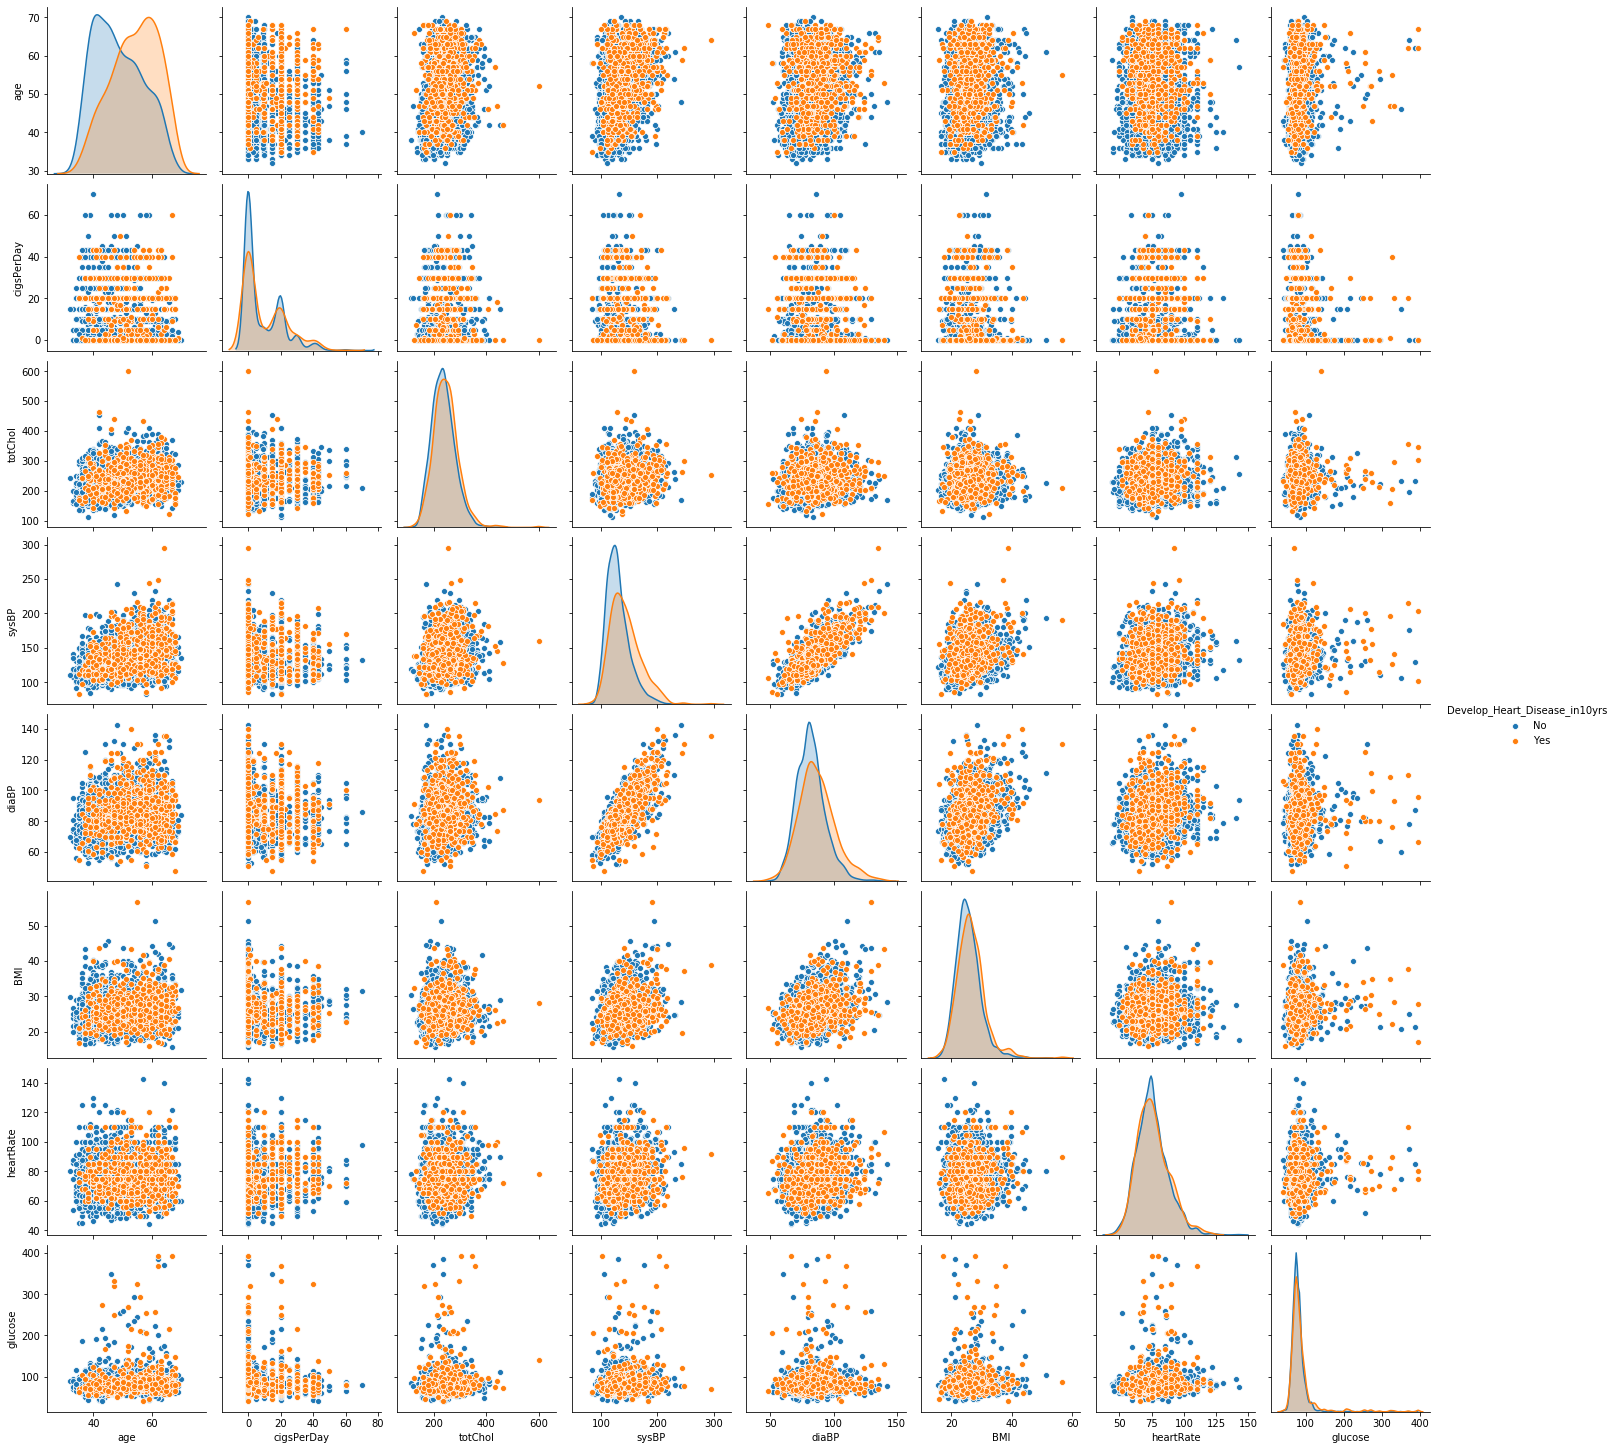

In [426]:
import seaborn as sns
sns.pairplot(df,hue='Develop_Heart_Disease_in10yrs')

In [515]:
y = dataset['Develop_Heart_Disease_in10yrs'] # Target/Dependent Variable
X = dataset.drop(['Develop_Heart_Disease_in10yrs'], axis = 1) # Independent features

In [428]:
X

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender_Female,Gender_Male,...,education_High School,education_Vocational School,age_category_<40,age_category_<50,age_category_<60,age_category_<=70,currentSmoker_Non-Smoker,currentSmoker_Smoker,BPMeds_No,BPMeds_Yes
0,-1.232580,-0.757169,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044,1,0,...,0,0,1,0,0,0,1,0,1,0
1,-0.414905,-0.757169,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883,0,1,...,0,0,0,1,0,0,1,0,1,0
2,-0.181283,0.920689,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920,1,0,...,1,0,0,1,0,0,0,1,1,0
3,1.337256,1.759618,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782,0,1,...,0,1,0,0,0,1,0,1,1,0
4,-0.414905,1.172368,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672,0,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,0.052338,-0.673276,1.727136,2.111473,0.758645,0.046051,-0.812255,0.173511,1,0,...,1,0,0,0,1,0,0,1,1,0
3654,0.169149,2.850225,-0.676947,-0.265830,-0.243642,-1.493908,-0.895729,-0.579599,1,0,...,0,1,0,0,1,0,0,1,1,0
3655,0.285960,-0.757169,0.729214,0.051143,0.006930,-1.060948,0.356370,1.052139,0,1,...,0,0,0,0,1,0,1,0,1,0
3656,-1.115769,-0.757169,-1.175908,0.390758,1.259788,-0.044969,-0.728782,-0.412241,1,0,...,0,1,0,1,0,0,1,0,1,0


In [429]:
y

0        No
1        No
2        No
3       Yes
4        No
       ... 
3653    Yes
3654     No
3655     No
3656     No
3657     No
Name: Develop_Heart_Disease_in10yrs, Length: 3658, dtype: object

# KNN Model without balancing the target feature

## Train Test Split

In [430]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30) # Split dataset into train and test in the ratio 7:3

## Using KNN

In [431]:
from sklearn.neighbors import KNeighborsClassifier # Import the KNN classifier library

In [432]:
knn = KNeighborsClassifier(n_neighbors=1) # Instantiate KNN object with k=1

In [433]:
knn.fit(X_train,y_train)# fitting the train and test datasets to the KNN model

KNeighborsClassifier(n_neighbors=1)

In [434]:
pred = knn.predict(X_test) # prediction

## Predictions and Evaluations

Let's evaluate our KNN model!

In [435]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [436]:
CM=confusion_matrix(y_test,pred) # TO check the accuracy of the prediction vs actual value use confusion matrix

In [437]:
print(CM)

[[816 100]
 [153  29]]


In [438]:
TP=CM[1][1]
TN=CM[0][0]
FP=CM[0][1]
FN=CM[1][0]

accuracy=(TP+TN)/(TP+TN+FP+FN)
accuracy

0.7695810564663024

In [439]:
print(classification_report(y_test,pred)) # Confusion matrix classification report

              precision    recall  f1-score   support

          No       0.84      0.89      0.87       916
         Yes       0.22      0.16      0.19       182

    accuracy                           0.77      1098
   macro avg       0.53      0.53      0.53      1098
weighted avg       0.74      0.77      0.75      1098



**Observation: The accuracy for the KNN model K=1 and imbalanced data seems to have an accuracy of 77%.**
    
Now, we see will see how to choose an appropriate K value to get a better result.

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

Idea behind choosing an appropriate K value: We will plot the accuracy_rate or error_rate vs different K values in the for loop. This experiment is conducted for 10 times given by the parameter cv=10. The K value where we get a stable error/accuracy rate is the appropriate K value.

In [440]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

In [441]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    error_rate.append(1-score.mean())

In [442]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Accuracy Rate')

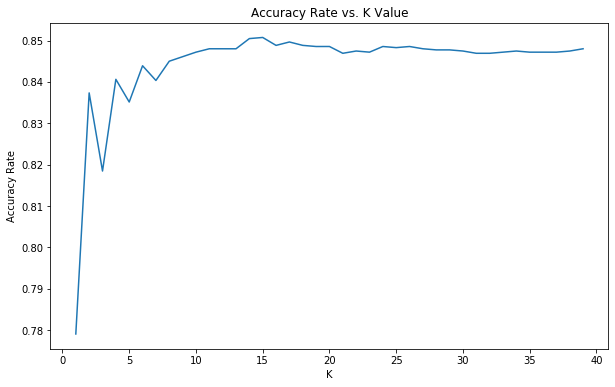

In [443]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

**Observation: From the above graph of accuracy_rate vs K, we see that at K=11 the accuracy rate stabilises. Hence, we can select K=11 as an approprite K value.**

In [444]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[816 100]
 [153  29]]


              precision    recall  f1-score   support

          No       0.84      0.89      0.87       916
         Yes       0.22      0.16      0.19       182

    accuracy                           0.77      1098
   macro avg       0.53      0.53      0.53      1098
weighted avg       0.74      0.77      0.75      1098



In [445]:
# NOW WITH K=11
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=11


[[907   9]
 [172  10]]


              precision    recall  f1-score   support

          No       0.84      0.99      0.91       916
         Yes       0.53      0.05      0.10       182

    accuracy                           0.84      1098
   macro avg       0.68      0.52      0.50      1098
weighted avg       0.79      0.84      0.78      1098



In [446]:
CM=confusion_matrix(y_test,pred)
print(CM)

[[907   9]
 [172  10]]


In [447]:
TP=CM[1][1]
TN=CM[0][0]
FP=CM[0][1]
FN=CM[1][0]

accuracy=(TP+TN)/(TP+TN+FP+FN)
accuracy

0.8351548269581056

### Accuracy with k=1(imbalanced)= 77%
### Accuracy with k=11(imbalanced)= 84%

### Hence, we can conclude that with selecting a proper K value we can increase the accuracy of the model prediction.

## Since this is a imbalanced dataset there could be bias in the prediction as the Yes are more in number than No. To overcome this bias we use oversampling technique to do it.

In [448]:
z=y

In [449]:
z.value_counts()

No     3101
Yes     557
Name: Develop_Heart_Disease_in10yrs, dtype: int64

In [450]:
df

,Gender,age,age_category,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Develop_Heart_Disease_in10yrs
0,Female,39,<40,College,Non-Smoker,0,No,No,No,No,195,106.0,70.0,26.97,80,77,No
1,Male,46,<50,Graduate Equivalency Degree,Non-Smoker,0,No,No,No,No,250,121.0,81.0,28.73,95,76,No
2,Female,48,<50,High School,Smoker,20,No,No,No,No,245,127.5,80.0,25.34,75,70,No
3,Male,61,<=70,Vocational School,Smoker,30,No,No,Yes,No,225,150.0,95.0,28.58,65,103,Yes
4,Male,46,<50,Vocational School,Smoker,23,No,No,No,No,285,130.0,84.0,23.10,85,85,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,Female,50,<60,High School,Smoker,1,No,No,Yes,No,313,179.0,92.0,25.97,66,86,Yes
3654,Female,51,<60,Vocational School,Smoker,43,No,No,No,No,207,126.5,80.0,19.71,65,68,No
3655,Male,52,<60,Graduate Equivalency Degree,Non-Smoker,0,No,No,No,No,269,133.5,83.0,21.47,80,107,No
3656,Female,40,<50,Vocational School,Non-Smoker,0,No,No,Yes,No,185,141.0,98.0,25.60,67,72,No


In [451]:
df.Develop_Heart_Disease_in10yrs.replace(to_replace=["Yes","No"],value=[1,0],inplace=True)

In [452]:
df

,Gender,age,age_category,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Develop_Heart_Disease_in10yrs
0,Female,39,<40,College,Non-Smoker,0,No,No,No,No,195,106.0,70.0,26.97,80,77,0
1,Male,46,<50,Graduate Equivalency Degree,Non-Smoker,0,No,No,No,No,250,121.0,81.0,28.73,95,76,0
2,Female,48,<50,High School,Smoker,20,No,No,No,No,245,127.5,80.0,25.34,75,70,0
3,Male,61,<=70,Vocational School,Smoker,30,No,No,Yes,No,225,150.0,95.0,28.58,65,103,1
4,Male,46,<50,Vocational School,Smoker,23,No,No,No,No,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,Female,50,<60,High School,Smoker,1,No,No,Yes,No,313,179.0,92.0,25.97,66,86,1
3654,Female,51,<60,Vocational School,Smoker,43,No,No,No,No,207,126.5,80.0,19.71,65,68,0
3655,Male,52,<60,Graduate Equivalency Degree,Non-Smoker,0,No,No,No,No,269,133.5,83.0,21.47,80,107,0
3656,Female,40,<50,Vocational School,Non-Smoker,0,No,No,Yes,No,185,141.0,98.0,25.60,67,72,0


In [453]:
dataset1 = pd.get_dummies(df, columns = ['Gender', 'prevalentStroke', 'prevalentHyp',
       'diabetes',"education","age_category","currentSmoker","BPMeds"])

standardScaler = StandardScaler()
columns_to_scale = ['age', 'cigsPerDay','totChol', 'BMI', 'heartRate', 'glucose','sysBP',"diaBP"]
dataset1[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [454]:
dataset1

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Develop_Heart_Disease_in10yrs,Gender_Female,...,education_High School,education_Vocational School,age_category_<40,age_category_<50,age_category_<60,age_category_<=70,currentSmoker_Non-Smoker,currentSmoker_Smoker,BPMeds_No,BPMeds_Yes
0,-1.232580,-0.757169,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044,0,1,...,0,0,1,0,0,0,1,0,1,0
1,-0.414905,-0.757169,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883,0,0,...,0,0,0,1,0,0,1,0,1,0
2,-0.181283,0.920689,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920,0,1,...,1,0,0,1,0,0,0,1,1,0
3,1.337256,1.759618,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782,1,0,...,0,1,0,0,0,1,0,1,1,0
4,-0.414905,1.172368,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672,0,0,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,0.052338,-0.673276,1.727136,2.111473,0.758645,0.046051,-0.812255,0.173511,1,1,...,1,0,0,0,1,0,0,1,1,0
3654,0.169149,2.850225,-0.676947,-0.265830,-0.243642,-1.493908,-0.895729,-0.579599,0,1,...,0,1,0,0,1,0,0,1,1,0
3655,0.285960,-0.757169,0.729214,0.051143,0.006930,-1.060948,0.356370,1.052139,0,0,...,0,0,0,0,1,0,1,0,1,0
3656,-1.115769,-0.757169,-1.175908,0.390758,1.259788,-0.044969,-0.728782,-0.412241,0,1,...,0,1,0,1,0,0,1,0,1,0


In [455]:
#Create independent and Dependent Features
columns = dataset1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Develop_Heart_Disease_in10yrs"]]
# Store the variable we are predicting 
target = "Develop_Heart_Disease_in10yrs"
# Define a random state 
state = np.random.RandomState(42)
X = dataset1[columns]
Y = dataset1[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)


(3658, 28)
(3658,)


In [456]:
X

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender_Female,Gender_Male,...,education_High School,education_Vocational School,age_category_<40,age_category_<50,age_category_<60,age_category_<=70,currentSmoker_Non-Smoker,currentSmoker_Smoker,BPMeds_No,BPMeds_Yes
0,-1.232580,-0.757169,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044,1,0,...,0,0,1,0,0,0,1,0,1,0
1,-0.414905,-0.757169,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883,0,1,...,0,0,0,1,0,0,1,0,1,0
2,-0.181283,0.920689,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920,1,0,...,1,0,0,1,0,0,0,1,1,0
3,1.337256,1.759618,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782,0,1,...,0,1,0,0,0,1,0,1,1,0
4,-0.414905,1.172368,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672,0,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,0.052338,-0.673276,1.727136,2.111473,0.758645,0.046051,-0.812255,0.173511,1,0,...,1,0,0,0,1,0,0,1,1,0
3654,0.169149,2.850225,-0.676947,-0.265830,-0.243642,-1.493908,-0.895729,-0.579599,1,0,...,0,1,0,0,1,0,0,1,1,0
3655,0.285960,-0.757169,0.729214,0.051143,0.006930,-1.060948,0.356370,1.052139,0,1,...,0,0,0,0,1,0,1,0,1,0
3656,-1.115769,-0.757169,-1.175908,0.390758,1.259788,-0.044969,-0.728782,-0.412241,1,0,...,0,1,0,1,0,0,1,0,1,0


In [457]:
Y.value_counts()

0    3101
1     557
Name: Develop_Heart_Disease_in10yrs, dtype: int64

In [458]:
YES = dataset1[dataset1['Develop_Heart_Disease_in10yrs']==1]

NO = dataset1[dataset1['Develop_Heart_Disease_in10yrs']==0]

print(YES.shape,NO.shape)

(557, 29) (3101, 29)


In [459]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [460]:
import imblearn
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [461]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

In [462]:
X_res

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,Gender_Female,Gender_Male,...,education_High School,education_Vocational School,age_category_<40,age_category_<50,age_category_<60,age_category_<=70,currentSmoker_Non-Smoker,currentSmoker_Smoker,BPMeds_No,BPMeds_Yes
0,-1.232580,-0.757169,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044,1,0,...,0,0,1,0,0,0,1,0,1,0
1,-0.414905,-0.757169,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883,0,1,...,0,0,0,1,0,0,1,0,1,0
2,-0.181283,0.920689,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920,1,0,...,1,0,0,1,0,0,0,1,1,0
3,1.337256,1.759618,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782,0,1,...,0,1,0,0,0,1,0,1,1,0
4,-0.414905,1.172368,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672,0,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6181,0.285960,1.331018,0.751853,-0.509950,-0.824671,-0.965700,-0.451092,0.186269,1,0,...,1,0,0,0,1,0,0,1,1,0
6182,1.517457,-0.117232,-0.070394,1.264094,0.865258,0.125933,0.652939,0.188222,1,0,...,1,0,0,0,0,1,0,1,1,0
6183,-0.905608,-0.672923,-1.415896,-0.786192,-0.444591,-1.206533,-0.612482,-0.495039,0,1,...,1,0,0,1,0,0,0,0,1,0
6184,1.337256,0.501224,-0.646454,-0.393701,-0.159903,0.043749,-0.145761,0.020028,1,0,...,0,0,0,0,0,1,0,1,1,0


In [463]:
y_res.shape

(6186,)

In [464]:
y_res.value_counts()

1    3093
0    3093
Name: Develop_Heart_Disease_in10yrs, dtype: int64

Hence after performing SMOTomek oversampling from imblearn package we have now equalised the number of yes and number of nos in the Target variabe as can be seen from above.

In [465]:
pip show scikit-learn

Name: scikit-learn
Version: 0.23.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: f:\ana\lib\site-packages
Requires: numpy, scipy, threadpoolctl, joblib
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [466]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.30)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

CM=confusion_matrix(y_test,pred)

print(CM)

print(classification_report(y_test,pred))

[[745 197]
 [ 16 898]]
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       942
           1       0.82      0.98      0.89       914

    accuracy                           0.89      1856
   macro avg       0.90      0.89      0.88      1856
weighted avg       0.90      0.89      0.88      1856



In [467]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_res,y_res,cv=10)
    accuracy_rate.append(score.mean())

In [468]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [469]:
score.mean()

0.7326280512989424

Text(0, 0.5, 'Error Rate')

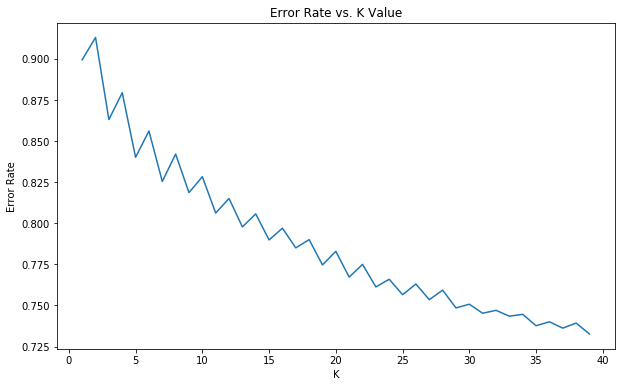

In [470]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         #markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [471]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[745 197]
 [ 16 898]]


              precision    recall  f1-score   support

           0       0.98      0.79      0.87       942
           1       0.82      0.98      0.89       914

    accuracy                           0.89      1856
   macro avg       0.90      0.89      0.88      1856
weighted avg       0.90      0.89      0.88      1856



In [476]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[647 295]
 [ 31 883]]


              precision    recall  f1-score   support

           0       0.95      0.69      0.80       942
           1       0.75      0.97      0.84       914

    accuracy                           0.82      1856
   macro avg       0.85      0.83      0.82      1856
weighted avg       0.85      0.82      0.82      1856



# Feature Selection or Feature Importance Check

### Approach 1: Using SelectKBest Algorithm

In [529]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [531]:
# Instantiating SelectKBest object for top 28 features(i.e for all the independent columns)
ordered_rank_features=SelectKBest(score_func=chi2,k=X.columns.nunique())

# Fitting the dependent(y) and independent(X) columns to the ordered_rank_features object
ordered_feature=ordered_rank_features.fit(X,y)

# Store the Feature Importance Scores in dfscores
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])

# Create a dataFrame to form a table of scores for the indepenent features
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank.sort_values("Score",ascending=False)

,Features,Score
3,sysBP,669.136021
7,glucose,379.914235
0,age,296.200344
2,totChol,250.490205
1,cigsPerDay,155.798307
4,diaBP,142.521814
13,prevalentHyp_Yes,82.845455
23,age_category_<=70,77.563077
20,age_category_<40,43.955659
12,prevalentHyp_No,37.507474


### Approach 2: Using ExtraTreesClassifier

In [520]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [521]:
print(model.feature_importances_)

[0.10220992 0.04951292 0.1055715  0.11678553 0.10957262 0.10409632
 0.09642032 0.10436723 0.01136861 0.0099075  0.00268948 0.00277051
 0.01463887 0.01314329 0.00644401 0.00630464 0.01557957 0.01715027
 0.01850132 0.01572592 0.00628511 0.00927185 0.01116624 0.01502427
 0.0112406  0.01137606 0.00638966 0.00648586]


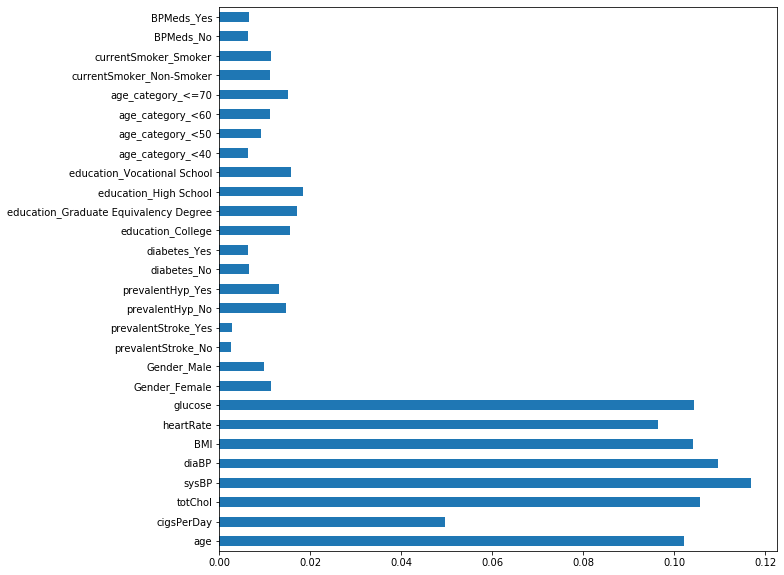

In [525]:
plt.figure(figsize=(10,10))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.plot(kind='barh')
plt.show()

### Approach 3: Using Info gain/Mutual info about target variable

In [526]:
from sklearn.feature_selection import mutual_info_classif

In [527]:
mutual_info=mutual_info_classif(X,y)

In [528]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

sysBP                                    0.031223
age_category_<40                         0.018785
age                                      0.018784
Gender_Female                            0.013721
prevalentHyp_No                          0.012393
glucose                                  0.012168
prevalentHyp_Yes                         0.011926
diaBP                                    0.010905
diabetes_No                              0.010034
age_category_<=70                        0.009954
totChol                                  0.008047
BMI                                      0.007177
Gender_Male                              0.005507
education_Vocational School              0.005222
prevalentStroke_No                       0.005180
diabetes_Yes                             0.004680
currentSmoker_Non-Smoker                 0.002919
cigsPerDay                               0.002388
education_Graduate Equivalency Degree    0.001955
currentSmoker_Smoker                     0.001696


# Conclusion: After balancing the dataset

##### Accuracy is still good with K=1 at 89%. But K=1 means that to decide a datapoint as an Yes or a No , the model compares it with 1 neighbor based on the Euclidean distance. 
##### This is not a correcct way to use to determine the classification which may lead to extreme overfitting where the model will be trying to predict the class by remembering the datapoint to a test data and not by building the relation with the dependent and independent features. 
##### Hence, looking at Error_rate vs K curve we can say that after K=5 the error rate actually decerease with stability. Though the acuuracy is 82% which may not be as equal to as K=1, still it is good as the classification happens with respect to 5 near neighbors.